# 📈 Polynomial Regression – Predicting Manufacturing Quality

In this notebook, we explore how *Polynomial Regression* can be used to predict the *Quality Rating* of a manufacturing process based on various physical and material features.

## 🧪 Dataset Overview

The dataset contains variables such as:

- *Temperature (°C)* and *Pressure (kPa)* during the manufacturing process
- *Temperature × Pressure* interaction term
- *Material Fusion Metric* and *Material Transformation Metric*
- Final output: *Quality Rating (0–100%)*

## 🎯 Goal

Our goal is to model the (potentially non-linear) relationship between process conditions and the final *Quality Rating. We apply **Polynomial Regression* to capture these complex patterns and compare the performance with a standard linear model.

This kind of analysis is crucial in modern *industrial quality control*, where slight variations in temperature or material handling can significantly affect product quality.

Let's dive in and build the model! 🔧

## 🧰 Libraries and Tools

We start by importing the essential Python libraries used for:

- *Data manipulation* → pandas, numpy
- *Modeling and preprocessing* → scikit-learn
- *Visualization* → matplotlib, seaborn

These tools will help us load the dataset, perform exploratory analysis, engineer polynomial features, and build our regression models.

In [3]:
import numpy as np                     # numerical operations
import pandas as pd                    # data handling
import matplotlib.pyplot as plt        # plotting
import seaborn as sns                  # advanced visualization
from sklearn.linear_model import LinearRegression          # linear model
from sklearn.model_selection import train_test_split       # split dataset

## 📥 Loading the Dataset

In this section, we load the manufacturing dataset into a Pandas DataFrame.

The dataset contains numerical features related to physical conditions (such as temperature and pressure) and material processing metrics.

We will take a quick look at the first few rows to understand the structure of the data.

In [4]:
#load the dataset
df = pd.read_csv('manufacturing.csv')

#show the first few rows
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


## 🧠 Data Structure & Missing Values

Before we begin modeling, it's important to understand the structure of our dataset and check for any missing values.

- df.info() tells us the number of entries, data types, and non-null values for each feature.
- df.isnull().sum() helps identify whether any columns contain missing data.

This initial inspection ensures that our data is clean and ready for modeling.

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

## 🎯 Selecting Features and Target using .iloc

To keep it simple, we define our feature matrix X and target vector y using column positions:

- X includes all columns *except the last one*, which represent the input features.
- y is the *last column*, representing the Quality Rating.

We use .iloc for positional indexing instead of column names at this stage.

In [6]:
x = df.iloc[:, :5].values
y = df.iloc[:, -1].values

## 🧪 Train/Test Split

To properly evaluate our model, we split the dataset into a **training set** and a **test set**.

- The training set will be used to fit the model.
- The test set will be used to evaluate how well the model generalizes to unseen data.

We'll use an 80/20 split using `train_test_split` from `scikit-learn`.


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

## 📈 Linear Regression – Baseline Model

To establish a baseline, we begin with a **Linear Regression** model.

Linear Regression assumes a linear relationship between the input features and the target variable. While this assumption is often too simplistic for real-world data, it provides a useful benchmark to compare against more complex models later — such as Polynomial Regression.

We'll train the model on the training data and evaluate its performance on the test set.


In [8]:

# Create and train the model
lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)


# Predict on test set
y_linear_prediction = lin_regressor.predict(x_test)


## 📊 Model Evaluation – Linear Regression

To evaluate the performance of our linear regression model, we calculate two standard metrics:

- **R² Score**: Measures how well the model explains the variance in the target variable. Closer to 1 is better.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Lower is better.

These metrics give us a baseline to compare with the more flexible polynomial regression model later.


In [9]:
from sklearn.metrics import r2_score,mean_squared_error


# Calculate evaluation metrics
r2_linear = r2_score(y_test,y_linear_prediction)
mse_linear = mean_squared_error(y_test,y_linear_prediction)

print(f'the r2_score for linear model is : {r2_linear}')
print(f'mse for linear model is : {mse_linear}')

the r2_score for linear model is : 0.5145614194082937
mse for linear model is : 99.1025809742642


### 🎯 Visualizing Linear Regression Predictions

Below is a scatter plot comparing the *actual* vs *predicted* quality ratings from our linear regression model.

- The *red dashed line* represents a perfect prediction (i.e., predicted = actual).
- The *blue dots* show the actual vs predicted outcomes for the test set.

If all points fell exactly on the red line, the model would be perfect.  
We can observe some dispersion around the line, especially at certain quality ranges, indicating that the linear model is not capturing all the complexity in the data — a good reason to now try *Polynomial Regression*.

C:\Users\arshi\AppData\Local\Temp\ipykernel_23840\3043410204.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


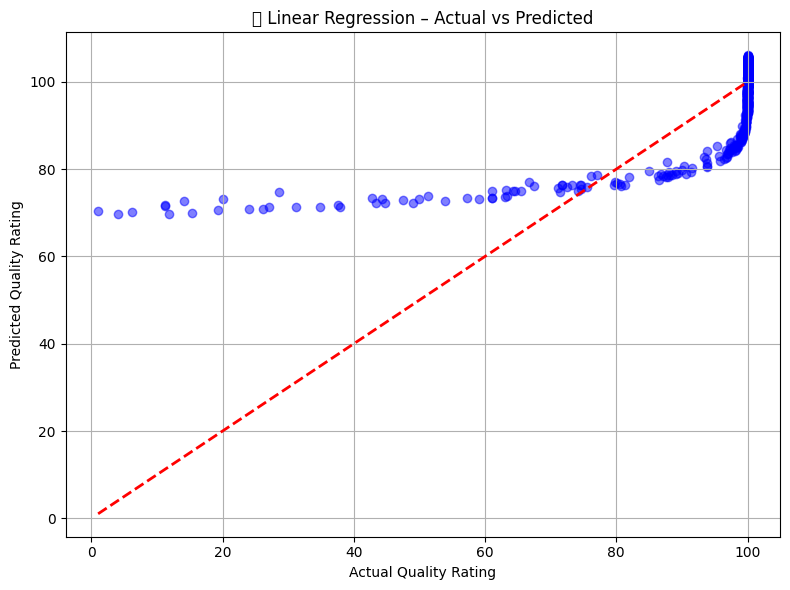

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_linear_prediction, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("📈 Linear Regression – Actual vs Predicted")
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Linear Regression Evaluation

We first trained a *Linear Regression* model to predict the manufacturing Quality Rating based on the provided input features.

The performance of the model on the test set was as follows:

- *R² Score*: 0.5145  
  This means the model explains roughly 51% of the variance in quality ratings — a decent start, but there is clearly room for improvement.

- *Mean Squared Error (MSE)*: 99.10  
  This tells us the average squared difference between actual and predicted values, and it's relatively high given our output scale (0–100).

🔍 These results suggest that a *linear relationship* might not fully capture the complexity of the manufacturing process. Let's try a *Polynomial Regression* model next to see if a non-linear fit improves the performance.

In [11]:
from sklearn.preprocessing import PolynomialFeatures       # generate polynomial terms
poly_regressor = PolynomialFeatures(degree=3)
x_poly = poly_regressor.fit_transform(x)
linear2 = LinearRegression()

### ✅ Evaluating Polynomial Regression Model

In this section, we evaluate the performance of our **Polynomial Regression model (degree = 3)** on the test set.

We transform the input features to polynomial terms, fit the model, and then calculate two key metrics:

- **R² Score**: Measures how well the model explains the variance in the data.
- **Mean Squared Error (MSE)**: Represents the average squared difference between actual and predicted values.

As you'll see below, this model significantly outperforms the linear baseline.


In [12]:
# Transform test data to polynomial features
x_test_poly = poly_regressor.transform(x_test)

# Train the polynomial model
linear2.fit(x_poly, y)

# Predict using the polynomial model
y_pred_poly = linear2.predict(x_test_poly)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print evaluation results
print(f"Polynomial Regression R² Score: {r2_poly:.4f}")
print(f"Polynomial Regression MSE: {mse_poly:.4f}")


Polynomial Regression R² Score: 0.9575
Polynomial Regression MSE: 8.6823


### 📈 Polynomial Regression – Actual vs Predicted

This plot shows the predicted quality ratings from the Polynomial Regression model (degree = 3) compared with the actual values.

- The **red dashed line** represents perfect prediction.
- The **purple points** are the model's predictions.

As seen here, predictions are tightly clustered around the ideal line, reflecting the high R² score of `0.9575` and low MSE of `8.68`.  
This demonstrates that the polynomial model effectively captures the complex relationships in the manufacturing data.


C:\Users\arshi\AppData\Local\Temp\ipykernel_23840\446276700.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


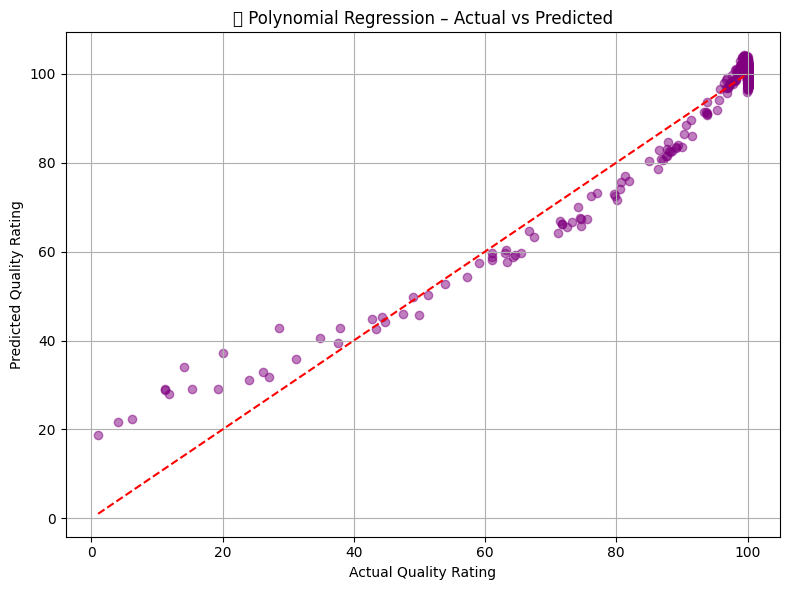

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("📈 Polynomial Regression – Actual vs Predicted")
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Conclusion

In this notebook, we explored and compared two regression models to predict manufacturing quality:

- **Linear Regression** (Baseline)
- **Polynomial Regression** (Degree = 3)

### 🔍 Key Insights:

- The **Linear Regression** model achieved an R² score of `0.5145` and an MSE of `99.10`, indicating that it could only partially capture the variability in the data.
- The **Polynomial Regression** model significantly outperformed it with an R² of `0.9575` and a much lower MSE of `8.68`.

These results confirm that the relationship between input features and quality rating is **non-linear**, and using a polynomial model greatly improves predictive accuracy.

### ✅ Final Thoughts:

- Polynomial regression can be a powerful tool for capturing non-linear trends, but care must be taken to avoid overfitting (especially with higher degrees).
- For further improvement, we could experiment with **regularized models** (like Ridge/Lasso), or apply **cross-validation** to make the evaluation more robust.

This modeling approach could be a useful asset for real-time quality prediction in industrial settings, helping reduce waste and improve manufacturing efficiency.


### 🔮 Future Work

While the current model demonstrates solid performance in predicting manufacturing output using multiple linear regression, there are several directions to improve and expand this analysis:

- **Regularization Techniques**: Implement Ridge and Lasso regression to handle potential multicollinearity and prevent overfitting.
- **Nonlinear Modeling**: Try polynomial regression or tree-based models (like Decision Tree, Random Forest, or XGBoost) to capture more complex relationships.
- **Feature Engineering**: Extract new variables such as production efficiency, machine hours, or worker productivity if data allows.
- **Time-Based Analysis**: Introduce time-series components (e.g., lag features or rolling averages) if the dataset includes timestamps.
- **Model Comparison**: Benchmark multiple regression models to determine the best-performing one for this domain.
- **Deployment Readiness**: Prepare the model for deployment by adding scaling, validation pipelines, and saving the trained model.

---

Adding these improvements can make the model more accurate, generalizable, and valuable in real-world factory production optimization scenarios.
